# House Price Prediction

# Exploratory Data Analysis

## Problem Statement - Estimationg house prices accurately for new properties

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### IMporting the data

In [2]:
df = pd.read_csv("/home/vibhav911/Documents/Internship/Future Intern/Internship_projects/House Price Prediction/data/Bengaluru_House_Data.csv")
df.head(6)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### observation
#### 1) There are outliers in bath feature
#### 2) 75% of dataset has only 3 baths.

### Checking for null values

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
 len([feature for feature in df.columns if df[feature].isnull().sum() != 0])

5

### Separating Numerical and Categorical variables

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features : ['bath', 'balcony', 'price']

We have 6 categorical features : ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']


### Categorical Features

In [9]:
categorical_columns = []
for i in categorical_features:
    print(f'{i}: {len(df[i].unique())}')
    if len(df[i].unique()) < 10:
        categorical_columns.append(i)
        

area_type: 4
availability: 81
location: 1306
size: 32
society: 2689
total_sqft: 2117


### Fixing Columns

#### 1) Availability

In [10]:
df = df.join(
    df.availability.str.extractall(r'(?i)(?P<availability_new>[A-Za-z A-Za-z]+)')
    .groupby(level=0).first()
)

In [11]:
df.drop('availability', axis =1 , inplace=True)

#### 2) Size

In [12]:
type(df['size'][0])

str

In [13]:
df['size'] = df['size'].str.split(' ').str[0]

In [14]:
df['size']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: object

### Dropping "location", 'society' from the dataset

In [15]:
df.drop(['location','society'], axis=1, inplace=True)

In [16]:
df.dropna(inplace=True)

### Converting total_sqft into numerical data

In [17]:
df = df.join(
    df.total_sqft.str.extractall(r'(?i)(?P<total_sqft_new>[\d.]+)')
    .groupby(level=0).first()
)

In [18]:
df['total_sqft_new'] = df['total_sqft_new'].astype(float)

In [19]:
df.drop('total_sqft', axis=1, inplace=True)

### balcony

In [20]:
df['balcony'] = df['balcony'].astype(str)

### bath

In [21]:
df['bath'] = df['bath'].astype(str)

### Again Separating Numerical feature and Categorical Features

In [22]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 2 numerical features : ['price', 'total_sqft_new']

We have 5 categorical features : ['area_type', 'size', 'bath', 'balcony', 'availability_new']


In [23]:
categorical_columns = []
for i in categorical_features:
    print(f'{i}: {len(df[i].unique())}')
    if len(df[i].unique()) < 10:
        categorical_columns.append(i)
        

area_type: 4
size: 16
bath: 16
balcony: 4
availability_new: 13


## Univariate Features

### a) Numerical Features

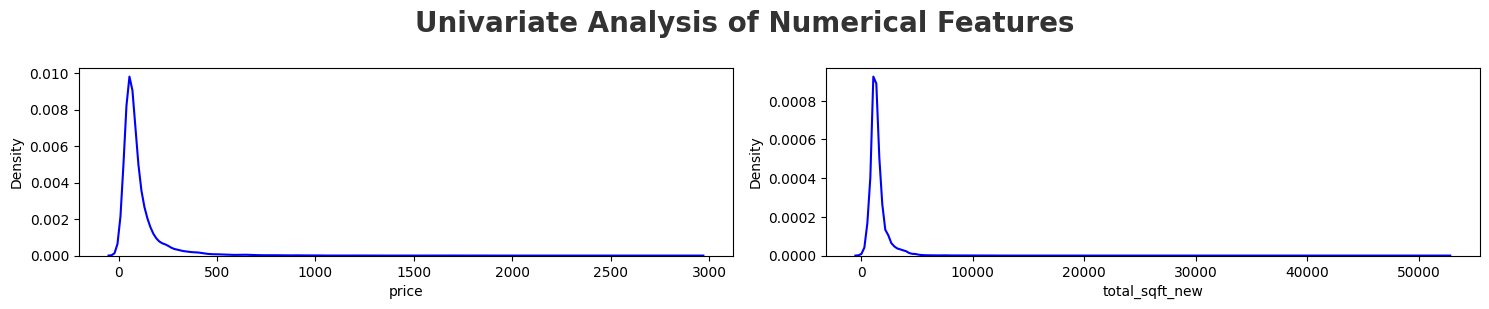

In [24]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Observation
#### 1) THere are more 1 and 2 no of balcony
#### 2) Plot of price and total_sqft is similar
#### 3) There are outliers in price and total_sqrt_new, bath

## categorical_columns

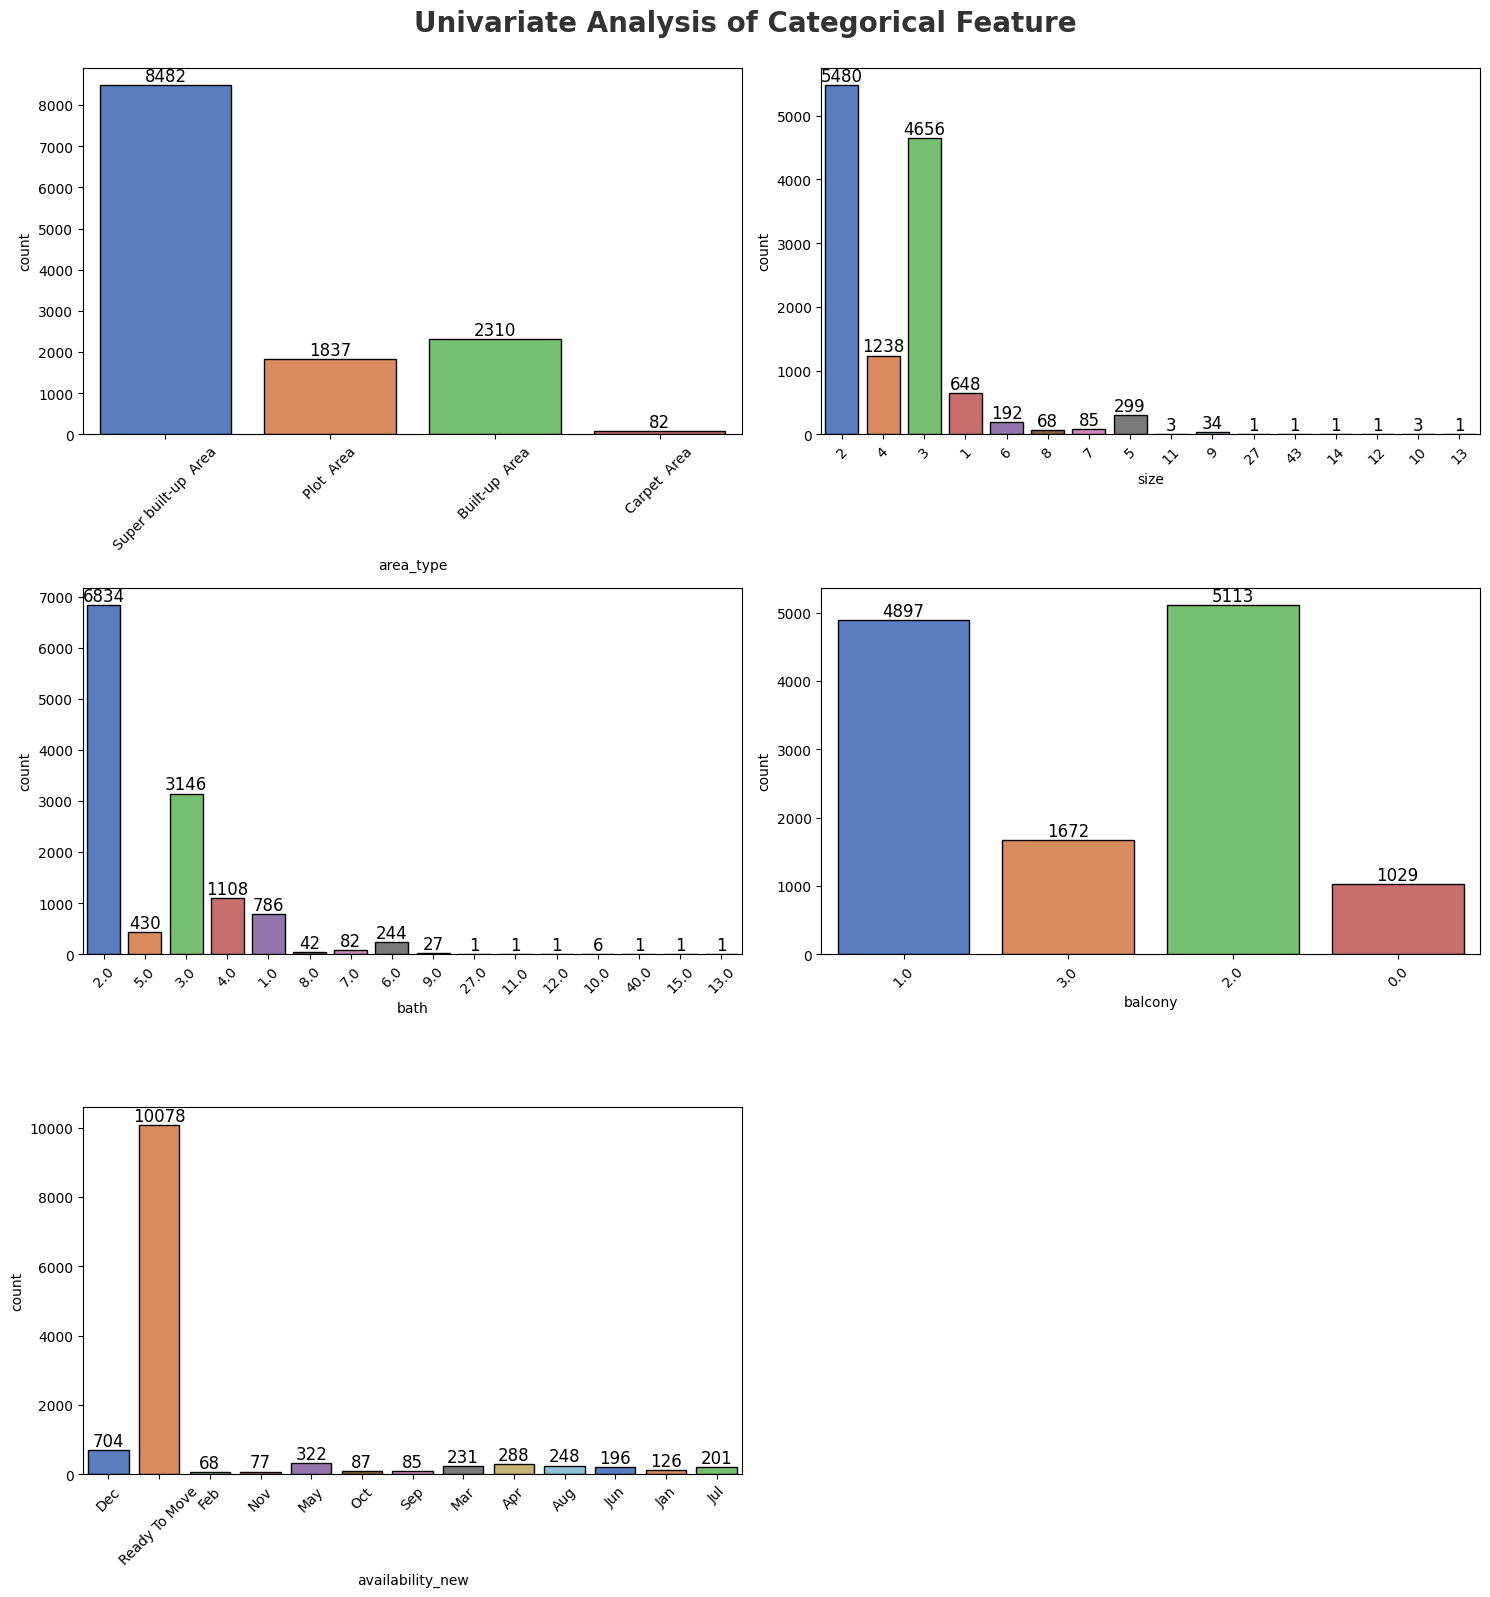

In [25]:
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Categorical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1)
for i in range(0, len(categorical_features)):
    plt.subplot(4,2, i+1)
    ax = sns.countplot(data = df, x = categorical_features[i], palette= 'muted', ec='black' ,legend=False, hue=categorical_features[i])
    for j in ax.containers:
        ax.bar_label(j, fontsize=12)
        plt.xlabel(categorical_features[i])
        plt.xticks(rotation=45)
        plt.tight_layout()

### Observation
#### 1) Most houses have Super built-up Area
#### 2) People ready to move is significantly high
#### 3) Count of 1 and 2 , number of balcony is quite higher than other
#### 4) In bath, 2 is significantly higher, then comes 3286

## Multivariate Analysis

### Numerical Features

In [26]:
numeric_corr=df[numeric_features].corr()
numeric_corr

,price,total_sqft_new
price,1.000000,0.555801
total_sqft_new,0.555801,1.000000


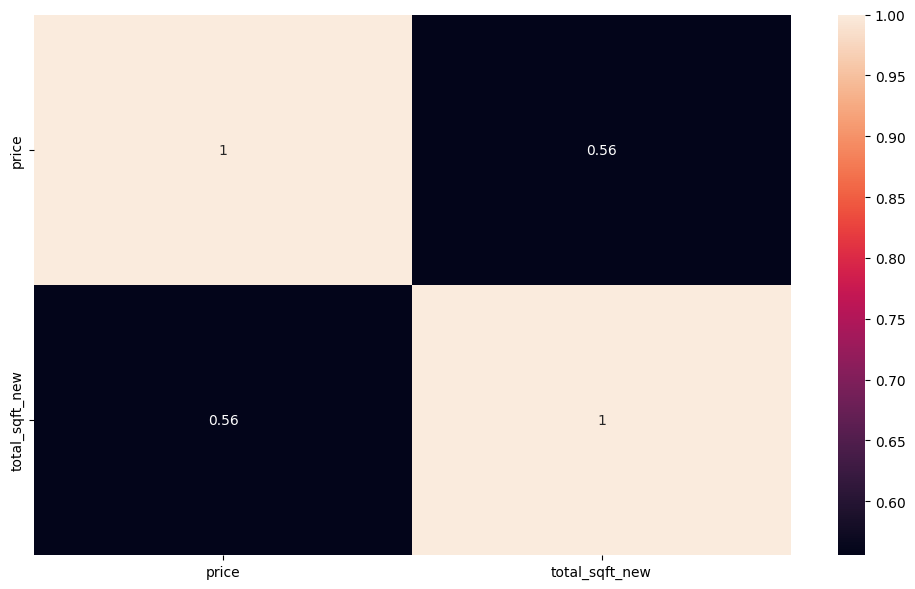

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_corr, annot=True, cbar=True)
plt.tight_layout()

### Observation 
#### 1) bath and price are slightly positively correlated

### Relationship between numerical and target feature

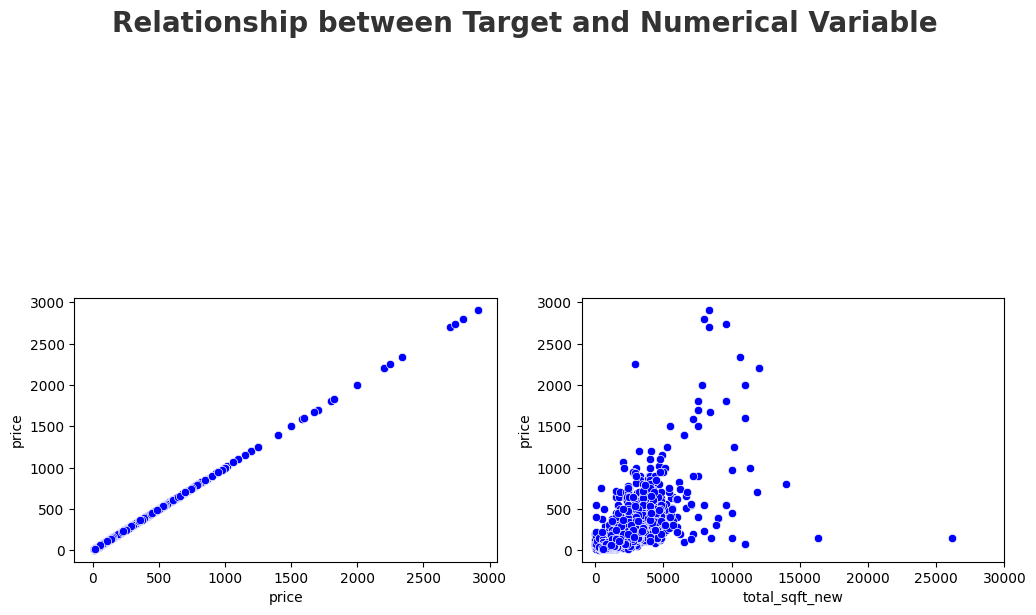

In [28]:
target_feature = 'price'
plt.figure(figsize=(12,24))
plt.suptitle("Relationship between Target and Numerical Variable",fontsize=20,fontweight='bold',alpha=0.8,y=1 )
for i in range(0, len(numeric_features)):
    plt.subplot(6,2,i+1)
    sns.scatterplot(y = target_feature, x = numeric_features[i], data = df, color='b')
    if df[numeric_features[i]].max() > 30000:
        plt.xlim(-1000,30000)
    if df[numeric_features[i]].max() > 3000000:
        plt.xlim(-1000,3000000)
        plt.ylim(-1000, 300000)
        plt.tight_layout()

## Visualizing independent features

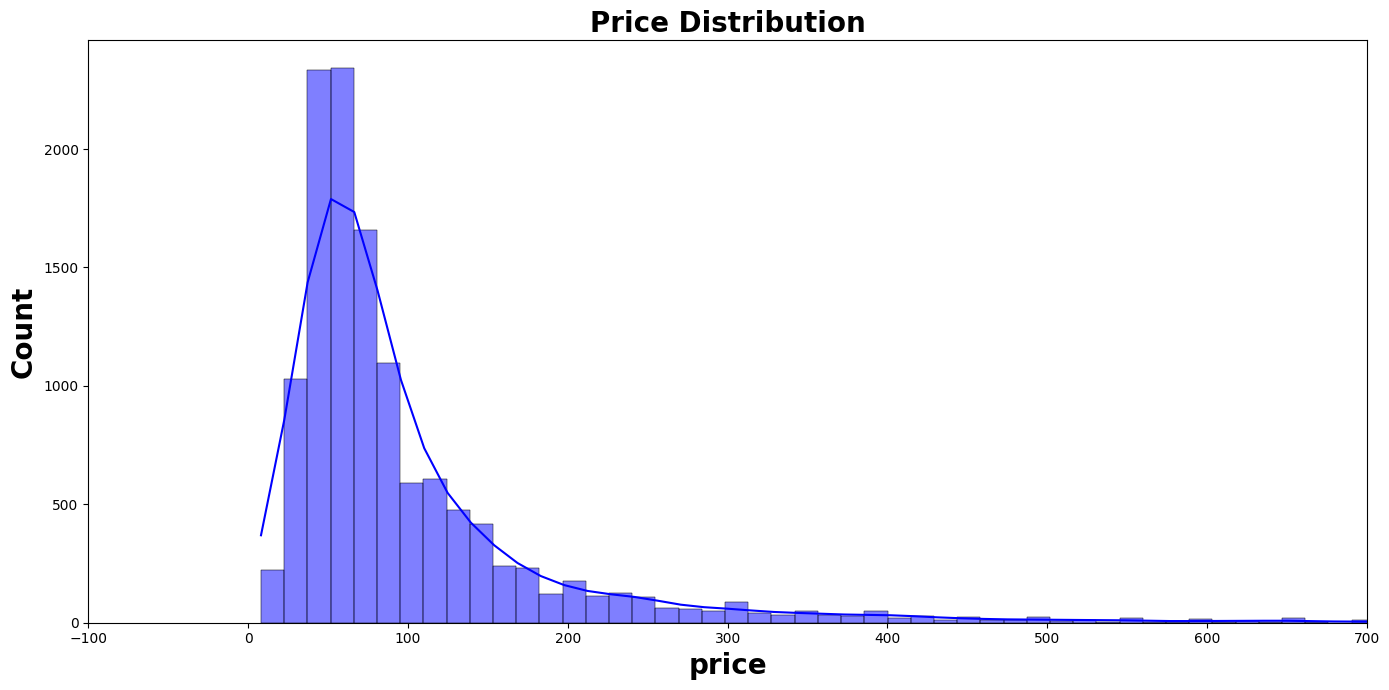

In [29]:
plt.figure(figsize=(14,7))
plt.title('Price Distribution', weight='bold', fontsize=20)
sns.histplot(x = target_feature, data= df, kde=True, color='b', bins=200)
plt.xlim(-100, 700)
plt.xlabel('price', fontsize=20, weight='bold')
plt.ylabel('Count', fontsize=20, weight='bold')
plt.tight_layout()

### Observation
#### Price is slightly Right Skewed

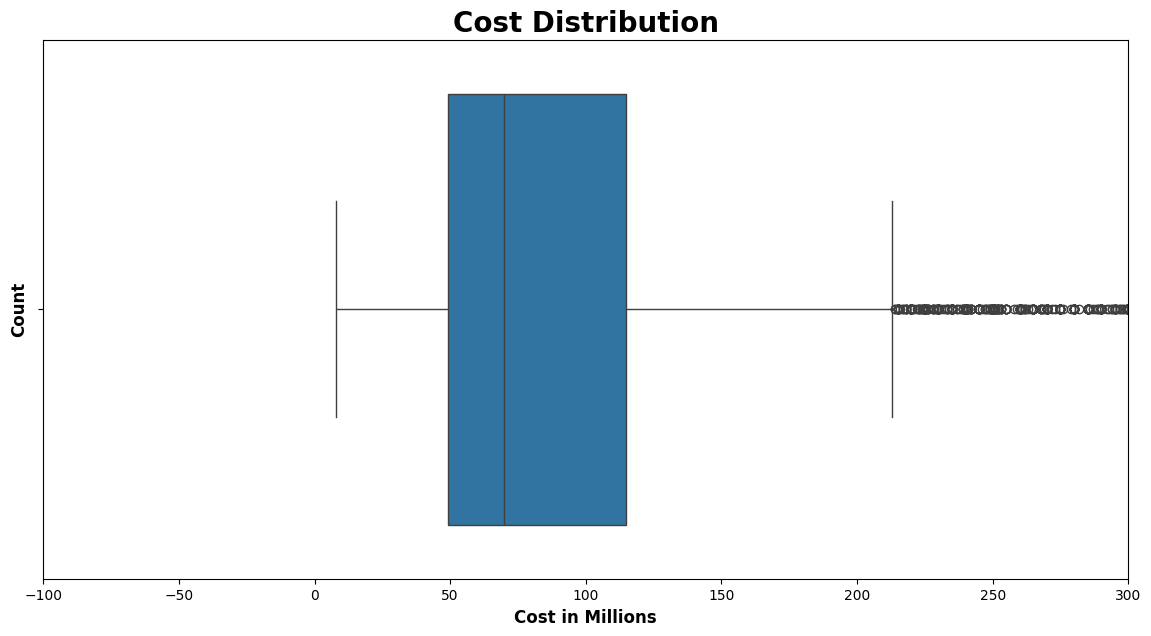

In [30]:
plt.figure(figsize=(14,7))
sns.boxplot(x = target_feature, data=df)
plt.title("Cost Distribution",fontsize=20, weight='bold')
plt.xlabel('Cost in Millions', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.xlim(-100, 300)
plt.show()

### Observation
#### There are a lot of outliers in Price feature

In [31]:
categorical_features

['area_type', 'size', 'bath', 'balcony', 'availability_new']

### How area_type affects price of the house

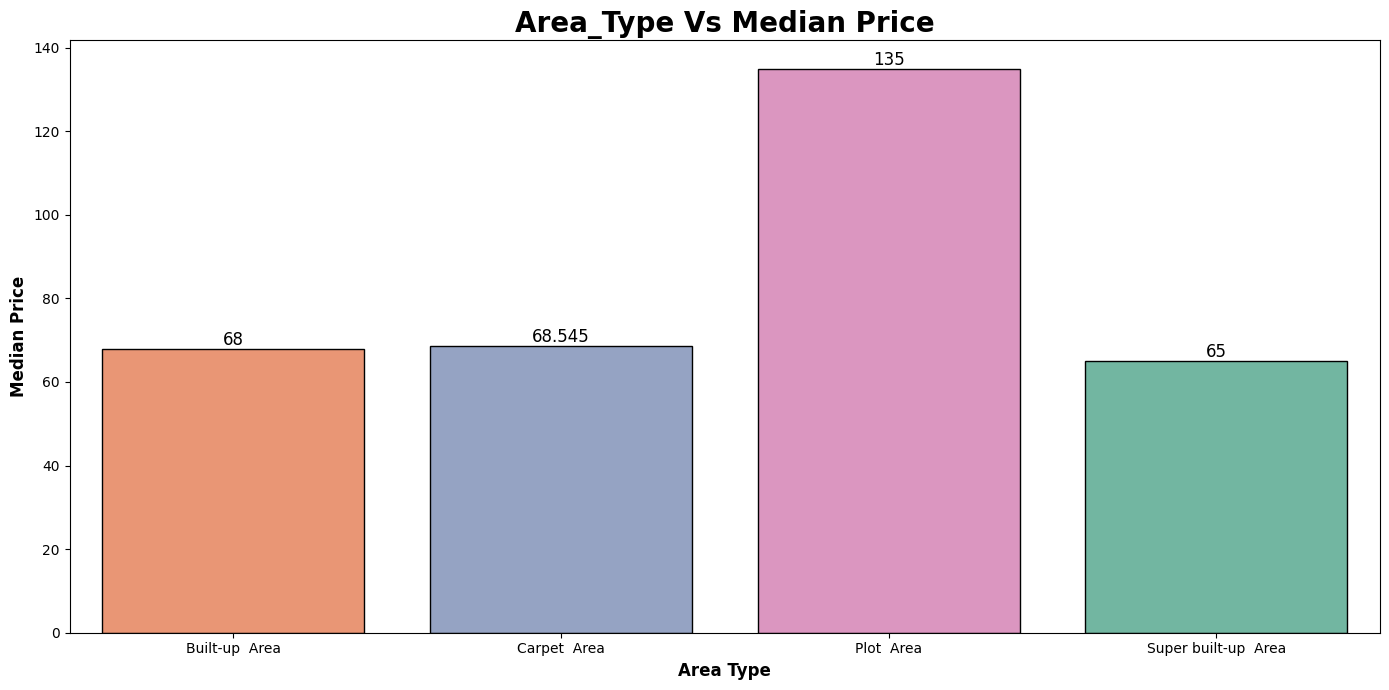

In [32]:
Area_Type = df.groupby("area_type")[target_feature].median()
Area_Type.to_frame()
plt.figure(figsize=(14,7))
plt.title("Area_Type Vs Median Price",fontsize=20, weight='bold')
ax=sns.barplot(x=Area_Type.index,y=Area_Type.values,palette='Set2',legend=False,hue=Area_Type,ec='black')
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
    plt.xlabel('Area Type', fontsize=12, weight='bold' )
    plt.ylabel('Median Price', fontsize=12, weight='bold')
    plt.tight_layout()

### Observation
#### 1) Price for Plot Area type is double of all other area types

### How Availability affects the Price of the house

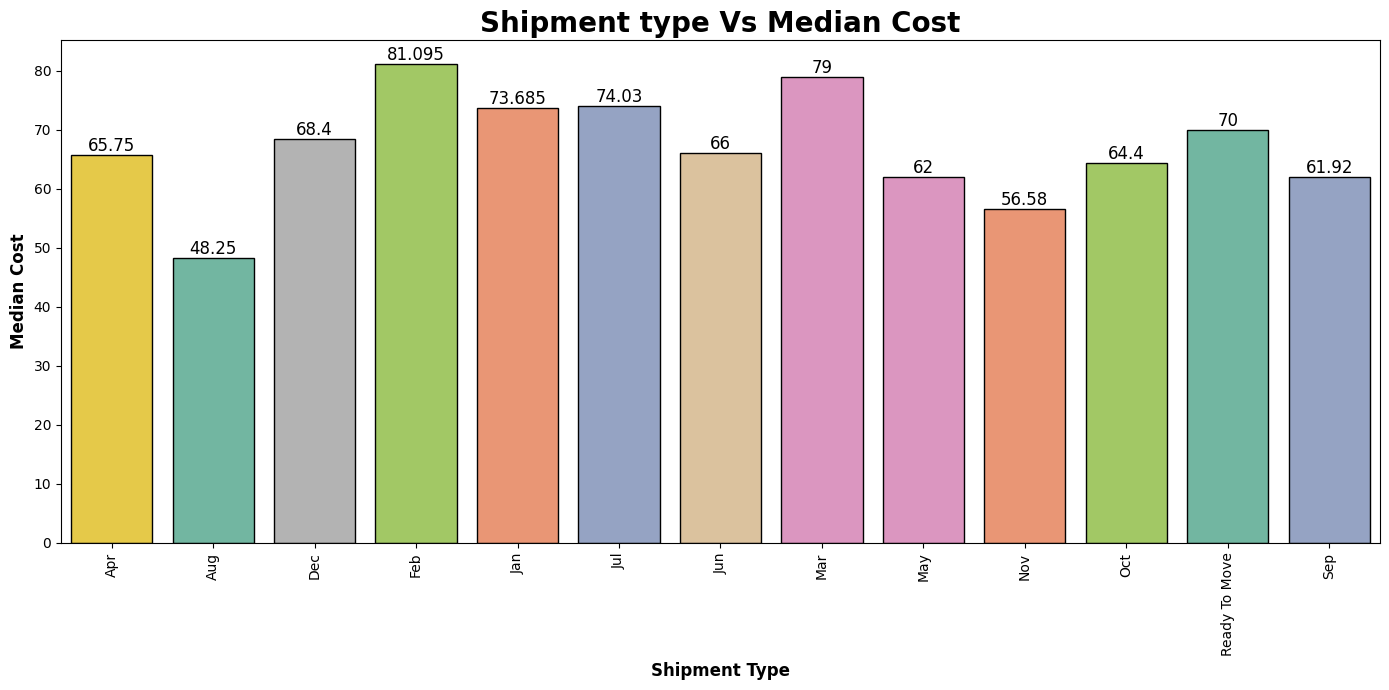

In [33]:
International = df.groupby("availability_new")[target_feature].median()
International.to_frame()
plt.figure(figsize=(14,7))
plt.title("Shipment type Vs Median Cost",fontsize=20, weight='bold')
ax=sns.barplot(x=International.index,y=International.values,palette='Set2',legend=False,hue=International,ec='black')
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
    plt.xlabel('Shipment Type', fontsize=12, weight='bold' )
    plt.ylabel('Median Cost', fontsize=12, weight='bold')
    plt.xticks(rotation=90)
    plt.tight_layout()

### Observation
#### 1) Demand of houses higher in jan,feb, march, jun, jul, Dec

## How bath affects the price of the houses

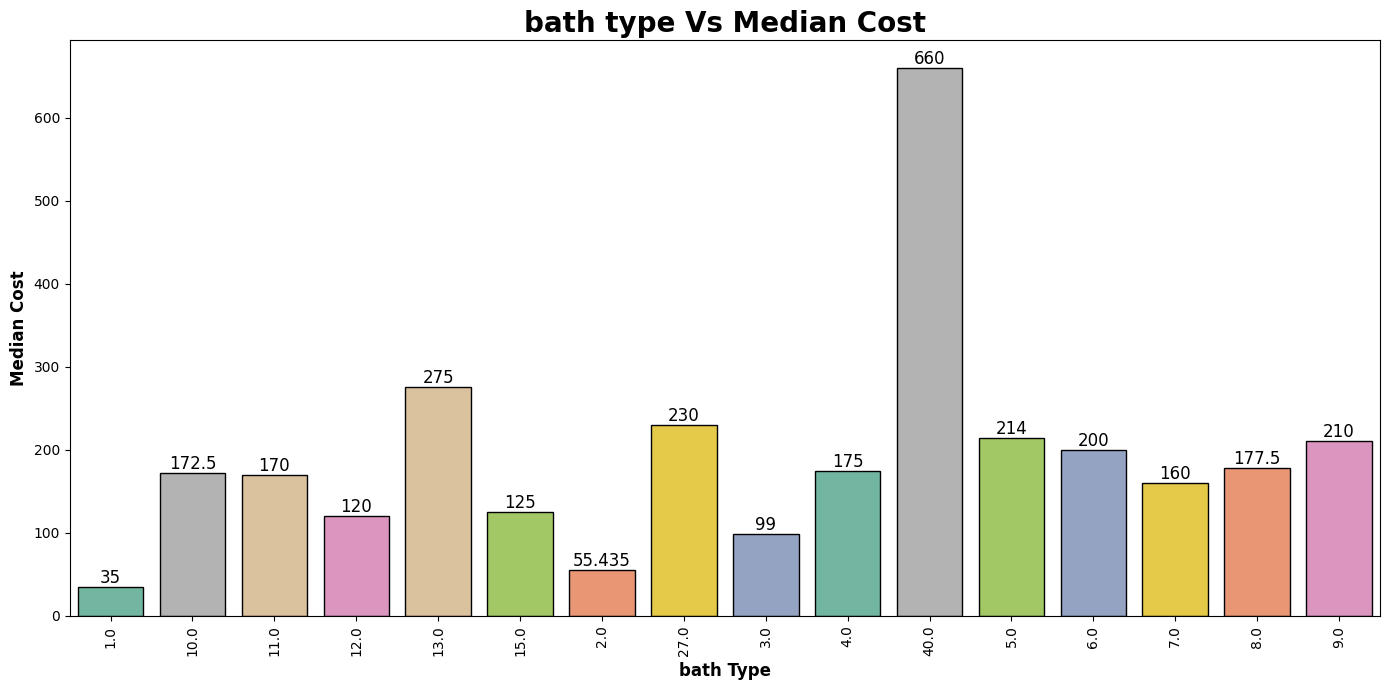

In [34]:
bath = df.groupby("bath")[target_feature].median()
bath.to_frame()
plt.figure(figsize=(14,7))
plt.title("bath type Vs Median Cost",fontsize=20, weight='bold')
ax=sns.barplot(x=bath.index,y=bath.values,palette='Set2',legend=False,hue=bath,ec='black')
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
    plt.xlabel('bath Type', fontsize=12, weight='bold' )
    plt.ylabel('Median Cost', fontsize=12, weight='bold')
    plt.xticks(rotation=90)
    plt.tight_layout()

## How number of balcony affects the price of the house

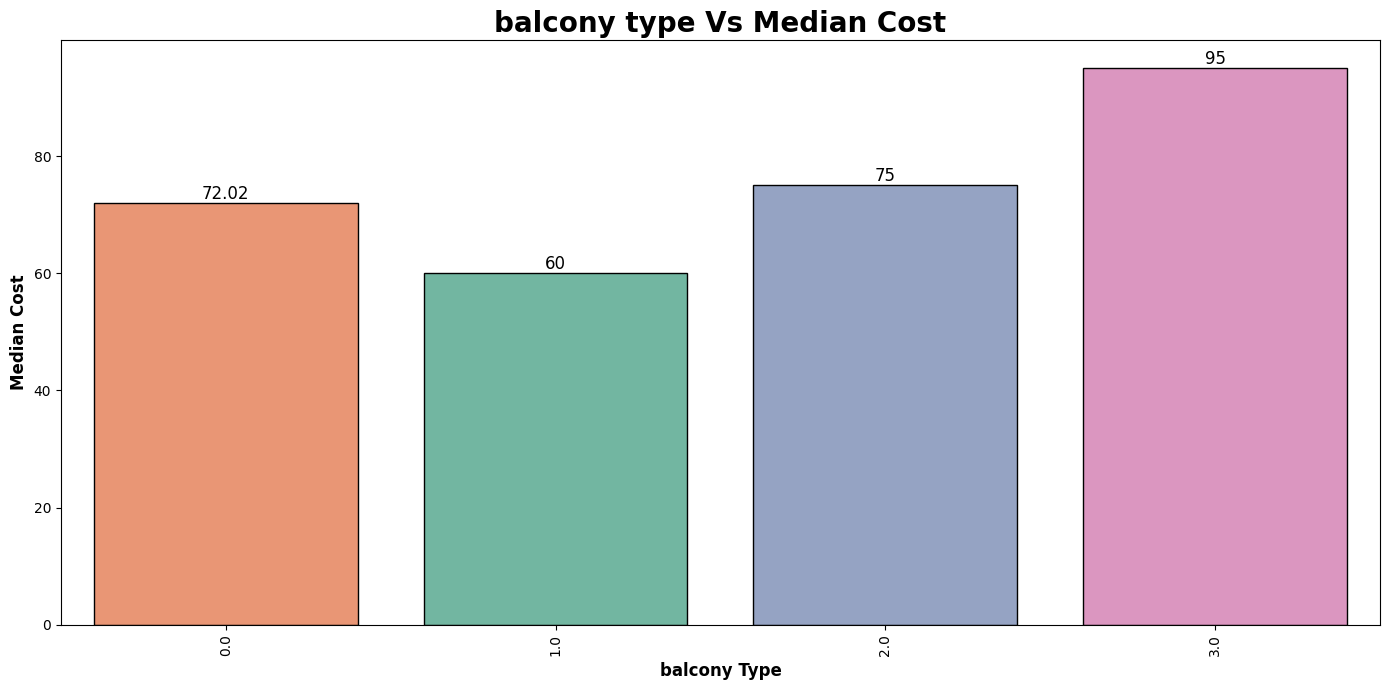

In [35]:
balcony = df.groupby("balcony")[target_feature].median()
balcony.to_frame()
plt.figure(figsize=(14,7))
plt.title("balcony type Vs Median Cost",fontsize=20, weight='bold')
ax=sns.barplot(x=balcony.index,y=balcony.values,palette='Set2',legend=False,hue=balcony,ec='black')
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
    plt.xlabel('balcony Type', fontsize=12, weight='bold' )
    plt.ylabel('Median Cost', fontsize=12, weight='bold')
    plt.xticks(rotation=90)
    plt.tight_layout()

## How bedroom size affects the price of the house

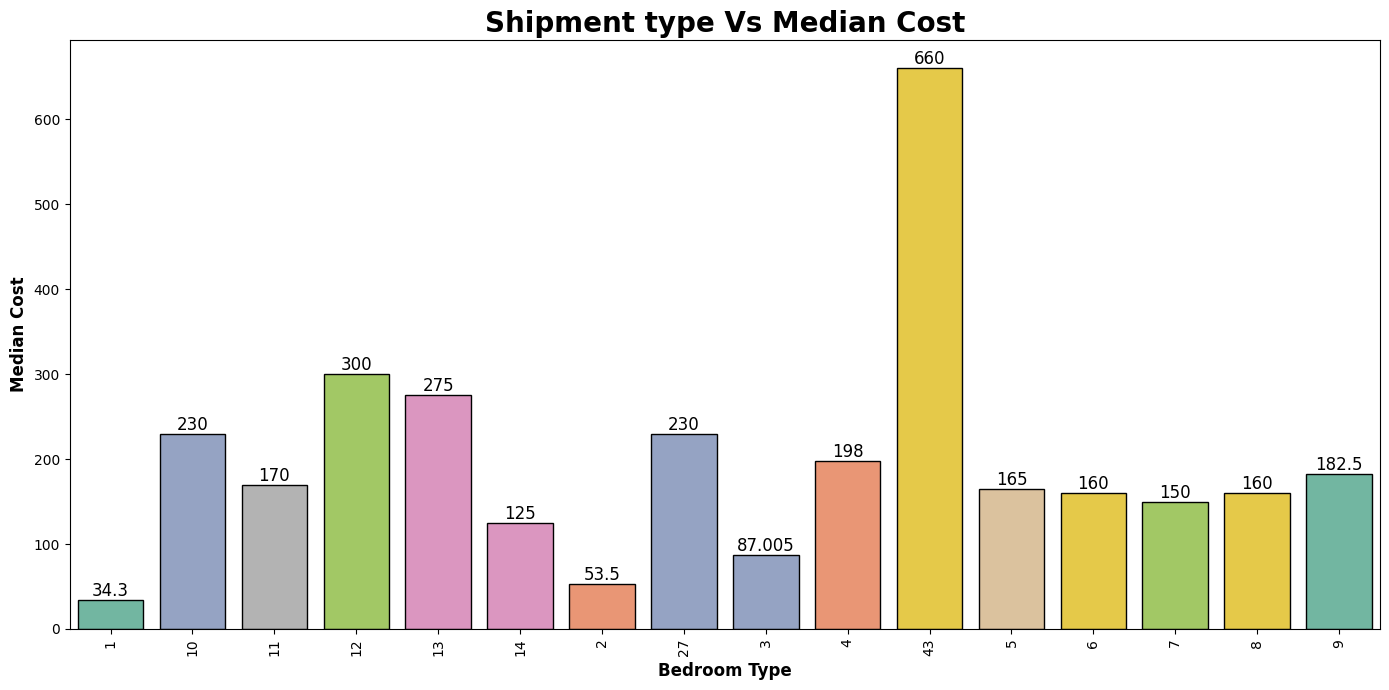

In [36]:
International = df.groupby("size")[target_feature].median()
International.to_frame()
plt.figure(figsize=(14,7))
plt.title("Shipment type Vs Median Cost",fontsize=20, weight='bold')
ax=sns.barplot(x=International.index,y=International.values,palette='Set2',legend=False,hue=International,ec='black')
for i in ax.containers:
    ax.bar_label(i, fontsize=12)
    plt.xlabel('Bedroom Type', fontsize=12, weight='bold' )
    plt.ylabel('Median Cost', fontsize=12, weight='bold')
    plt.xticks(rotation=90)
    plt.tight_layout()

## How Price of houses vary throughout the year

In [37]:
x = df.groupby('availability_new')['price'].median()
#df_wide = x.unstack().T
df_wide = x

In [38]:
df_wide

availability_new
Apr              65.750
Aug              48.250
Dec              68.400
Feb              81.095
Jan              73.685
Jul              74.030
Jun              66.000
Mar              79.000
May              62.000
Nov              56.580
Oct              64.400
Ready To Move    70.000
Sep              61.920
Name: price, dtype: float64

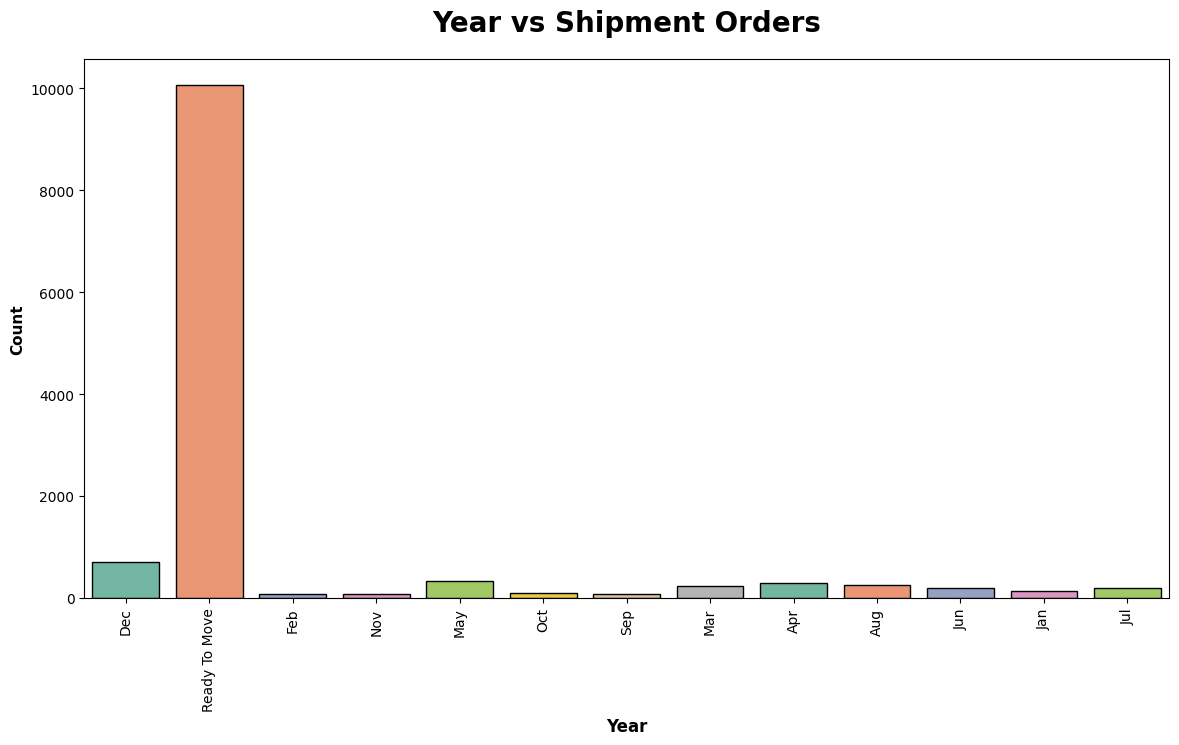

In [39]:
plt.subplots(figsize=(14,7))
ax=sns.countplot(x=df.availability_new,ec = "black", palette="Set2", legend=False, hue=df.availability_new)
plt.title("Year vs Shipment Orders", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=11)
plt.xlabel("Year", weight="bold", fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Final Report
#### 1) There are many outliers in all the 

# Feature Engineering 

## Data Cleaning

### Checking for Null Value

In [40]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
for feature in features_with_nan:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

### Checking for Duplicate Values

In [41]:
df.duplicated().sum()

1110

In [42]:
df.drop_duplicates(inplace=True)

### Separating Numerical and Non-Numerical Features

In [43]:
target_feature = 'price'
numeric_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
numeric_feature.remove(target_feature)
non_numeric_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('We have {} Numeric features:{}'.format(len(numeric_feature), numeric_feature))
print('We have {} Non numeric features:{}'.format(len(non_numeric_feature), non_numeric_feature))

We have 1 Numeric features:['total_sqft_new']
We have 5 Non numeric features:['area_type', 'size', 'bath', 'balcony', 'availability_new']


### Imputing nan value with median to check multicollinearity

In [44]:
df1 = df.copy()
for i in numeric_feature:
    df1.fillna({i:df1[i].median()}, inplace=True)

In [45]:
import statsmodels.api as sm
for i in range(0, len(numeric_feature)):
    x = df1[numeric_feature[i]]
    y = df1.price
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/(1-rsq), 2)
    print("Variance Inflation Factor of {} column is {} \n".format(numeric_feature[i], vif))

Variance Inflation Factor of total_sqft_new column is 2.35 



### Observation
#### 1) Numeric Feature is not very correlated

### Boxplot to see outliers

/tmp/ipykernel_15628/1643789749.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i], orient='h', palette='Set2', legend=False)


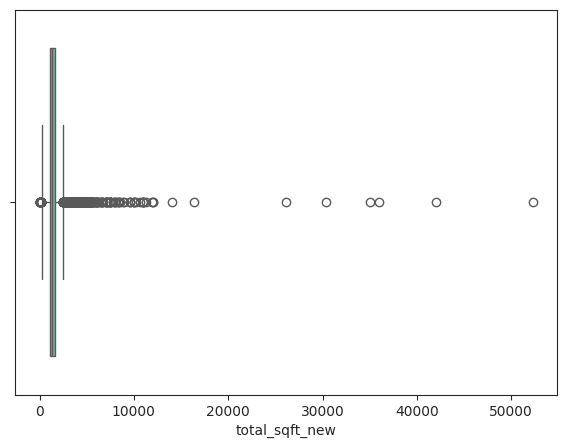

In [46]:
for i in numeric_feature:
    plt.figure(figsize=(7,5))
    sns.set_style('ticks')
    sns.boxplot(df[i], orient='h', palette='Set2', legend=False)

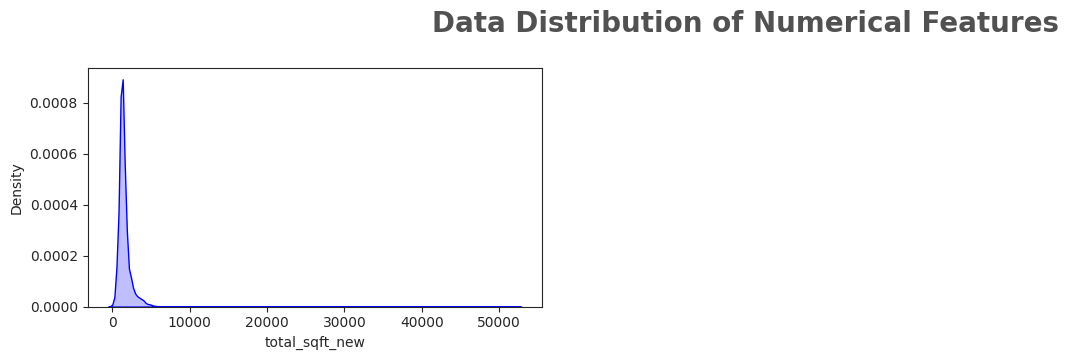

In [47]:
plt.figure(figsize=(15,15))
plt.suptitle('Data Distribution of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
for i in range(0, len(numeric_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_feature[i]], fill=True, color='b')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

### Checking for the skewness

In [48]:
df[numeric_feature].skew()

total_sqft_new    16.988592
dtype: float64

### Using Power Transformer for outliers

In [49]:
outlier_features = ['total_sqft_new']
outlier_data = df1[outlier_features]
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')

df1[outlier_features] = pt.fit_transform(df1[outlier_features])
df_outlier = pd.DataFrame(outlier_data, columns=outlier_features)

In [50]:
df1[outlier_features].skew()

total_sqft_new    0.284351
dtype: float64

### Histogram to check whether feature is still skewed or not

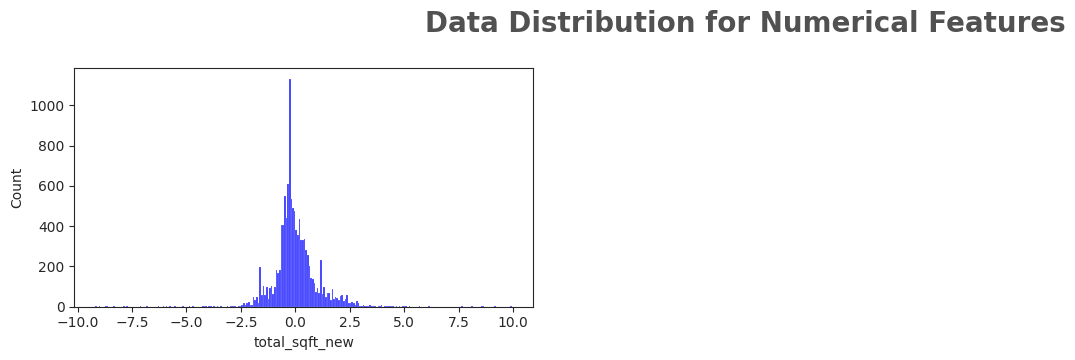

In [51]:
plt.figure(figsize=(15, 15))
plt.suptitle('Data Distribution for Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(outlier_features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df1[outlier_features[i]], color='b')
    plt.xlabel(outlier_features[i])
    plt.tight_layout()

/tmp/ipykernel_15628/4134948423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i], orient='h', palette='Set2')


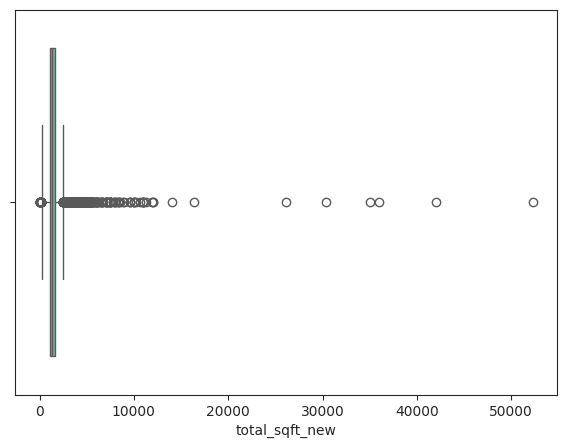

In [52]:
for i in outlier_features:
    plt.figure(figsize=(7,5))
    sns.set_style('ticks')
    sns.boxplot(df[i], orient='h', palette='Set2')

### Removing outliers from target column

In [53]:
df1['price'].skew()

7.651854529839627

(array([  59.,  323., 2440., 4456., 2606., 1042.,  490.,  143.,   26.,
          16.]),
 array([2.19722458, 2.775196  , 3.35316741, 3.93113883, 4.50911025,
        5.08708167, 5.66505309, 6.2430245 , 6.82099592, 7.39896734,
        7.97693876]),
 <BarContainer object of 10 artists>)

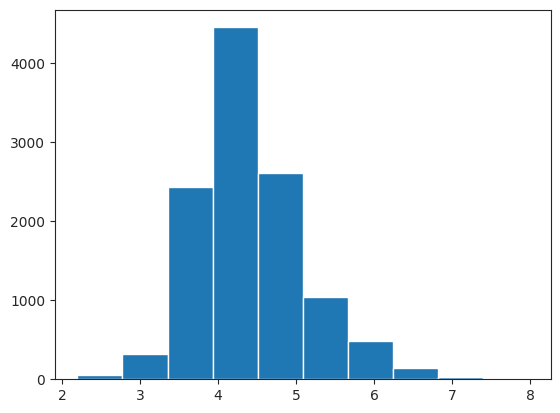

In [54]:
df1['price'] = np.log1p(df1['price'])
df1['price'].skew()
plt.hist(df1['price'])

In [55]:
df.fillna({'price':df['price'].median()}, inplace=True)

## Dropping Columns in category features

In [56]:
categorical_features

['area_type', 'size', 'bath', 'balcony', 'availability_new']

In [57]:
for i in categorical_features:
    print(df1[i].unique(),'\n')

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] 

['2' '4' '3' '1' '6' '8' '7' '5' '11' '9' '27' '43' '14' '12' '10' '13'] 

['2.0' '5.0' '3.0' '4.0' '1.0' '8.0' '7.0' '6.0' '9.0' '27.0' '11.0'
 '12.0' '10.0' '40.0' '15.0' '13.0'] 

['1.0' '3.0' '2.0' '0.0'] 

['Dec' 'Ready To Move' 'Feb' 'Nov' 'May' 'Oct' 'Sep' 'Mar' 'Apr' 'Aug'
 'Jun' 'Jan' 'Jul'] 



In [58]:
for i in categorical_features:
    print(df1[i].value_counts(),'\n')

area_type
Super built-up  Area    7580
Built-up  Area          2201
Plot  Area              1738
Carpet  Area              82
Name: count, dtype: int64 

size
2     4804
3     4304
4     1198
1      621
5      288
6      189
7       84
8       68
9       34
11       3
10       3
27       1
43       1
14       1
12       1
13       1
Name: count, dtype: int64 

bath
2.0     6025
3.0     2953
4.0     1052
1.0      747
5.0      423
6.0      239
7.0       82
8.0       42
9.0       26
10.0       6
27.0       1
11.0       1
12.0       1
40.0       1
15.0       1
13.0       1
Name: count, dtype: int64 

balcony
2.0    4549
1.0    4466
3.0    1600
0.0     986
Name: count, dtype: int64 

availability_new
Ready To Move    9166
Dec               613
May               314
Apr               282
Mar               224
Aug               217
Jun               187
Jul               186
Jan               112
Oct                83
Sep                76
Nov                73
Feb                68
Name: cou

# Feature Selection

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [60]:
label = pd.DataFrame()
for i in categorical_features:
    df1[i+'_new'] = label_encoder.fit_transform(df1[i])
    ac = label_encoder.classes_
    label[i+'_new'] = pd.DataFrame(ac, columns=[i])

In [61]:
label

,area_type_new,size_new,bath_new,balcony_new,availability_new_new
0,Built-up Area,1,1.0,0.0,Apr
1,Carpet Area,10,10.0,1.0,Aug
2,Plot Area,11,11.0,2.0,Dec
3,Super built-up Area,12,12.0,3.0,Feb


In [62]:
df1.columns

Index(['area_type', 'size', 'bath', 'balcony', 'price', 'availability_new',
       'total_sqft_new', 'area_type_new', 'size_new', 'bath_new',
       'balcony_new', 'availability_new_new'],
      dtype='object')

In [63]:
df1.drop(['area_type', 'size', 'bath', 'balcony','availability_new'], axis=1, inplace=True)

In [64]:
df1

,price,total_sqft_new,area_type_new,size_new,bath_new,balcony_new,availability_new_new
0,3.690628,-0.533062,3,6,6,1,2
1,4.795791,1.382596,2,9,11,3,11
2,4.143135,0.097851,0,8,6,3,11
3,4.564348,0.212196,3,8,8,1,11
4,3.951244,-0.276514,3,6,6,1,11
...,...,...,...,...,...,...,...
13310,3.983599,-0.544385,3,6,6,2,11
13312,3.871201,-0.174079,3,6,6,2,11
13315,5.446737,2.040435,0,11,9,0,11
13317,4.110874,-0.378272,0,6,6,1,11


# Model Training

In [65]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from scipy.stats import uniform, randint



In [66]:
# Split the data into train and test sets
X = df1.drop(columns=['price'])  # Replace 'target_column' with your target column name
y = df1['price']

In [67]:
# Splitting the X, y into Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [68]:
from dask.distributed import Client
import joblib

client = Client(processes=False)     

/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 1/5] END ...copy_X=True, fit_intercept=True;, score=0.542 total time=   0.0s
[CV 1/5] END ..copy_X=False, fit_intercept=True;, score=0.542 total time=   0.0s
[CV 1/5] END .copy_X=True, fit_intercept=False;, score=-0.490 total time=   0.0s
[CV 2/5] END .copy_X=True, fit_intercept=False;, score=-0.483 total time=   0.0s
[CV 1/5] END copy_X=False, fit_intercept=False;, score=-0.490 total time=   0.0s
[CV 2/5] END ...copy_X=True, fit_intercept=True;, score=0.573 total time=   0.0s
[CV 2/5] END copy_X=False, fit_intercept=False;, score=-0.483 total time=   0.0s
[CV 3/5] END .copy_X=True, fit_intercept=False;, score=-0.382 total time=   0.0s
[CV 3/5] END ..copy_X=False, fit_intercept=True;, score=0.584 total time=   0.0s
[CV 3/5] END ...copy_X=True, fit_intercept=True;, score=0.584 total time=   0.0s
[CV 2/5] END ..copy_X=False, fit_intercept=True;, score=0.573 total time=   0.1s
[CV 4/5] END .copy_X=True, fit_intercept=False;, score=-0.520 total time=   0.0s
[CV 4/5] END ...copy_X=True,

/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 1/5] END .....max_depth=5, n_estimators=10;, score=-3.288 total time=   0.1s
[CV 1/5] END .....max_depth=7, n_estimators=10;, score=-3.283 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=10;, score=-3.499 total time=   0.1s
[CV 2/5] END .....max_depth=7, n_estimators=10;, score=-3.491 total time=   0.1s
[CV 2/5] END ......max_depth=5, n_estimators=20;, score=0.209 total time=   0.2s
[CV 3/5] END .....max_depth=5, n_estimators=10;, score=-3.292 total time=   0.1s
[CV 1/5] END ......max_depth=5, n_estimators=20;, score=0.223 total time=   0.2s
[CV 3/5] END ......max_depth=5, n_estimators=20;, score=0.233 total time=   0.2s
[CV 1/5] END ......max_depth=7, n_estimators=20;, score=0.225 total time=   0.2s
[CV 2/5] END ......max_depth=7, n_estimators=20;, score=0.213 total time=   0.2s
[CV 5/5] END .....max_depth=5, n_estimators=10;, score=-3.003 total time=   0.1s
[CV 1/5] END ......max_depth=5, n_estimators=50;, score=0.720 total time=   0.3s
[CV 3/5] END .....max_depth=

/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 4/5] END .....max_depth=7, n_estimators=10;, score=-3.307 total time=   0.2s
[CV 4/5] END ......max_depth=5, n_estimators=20;, score=0.218 total time=   0.2s
[CV 1/5] END ......max_depth=5, n_estimators=80;, score=0.722 total time=   0.4s
[CV 2/5] END ......max_depth=5, n_estimators=80;, score=0.727 total time=   0.4s
[CV 4/5] END ......max_depth=5, n_estimators=50;, score=0.714 total time=   0.3s
[CV 5/5] END .....max_depth=7, n_estimators=10;, score=-3.005 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=100;, score=0.726 total time=   0.4s
[CV 1/5] END .....max_depth=5, n_estimators=100;, score=0.722 total time=   0.5s
[CV 3/5] END ......max_depth=7, n_estimators=20;, score=0.233 total time=   0.2s
[CV 5/5] END ......max_depth=7, n_estimators=20;, score=0.249 total time=   0.2s
[CV 3/5] END ......max_depth=5, n_estimators=50;, score=0.746 total time=   0.3s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 4/5] END ......max_depth=5, n_estimators=80;, score=0.716 total time=   0.4s
[CV 4/5] END ......max_depth=7, n_estimators=50;, score=0.714 total time=   0.3s
[CV 5/5] END ....max_depth=10, n_estimators=10;, score=-3.005 total time=   0.1s
[CV 3/5] END ....max_depth=10, n_estimators=10;, score=-3.290 total time=   0.1s
[CV 5/5] END ......max_depth=5, n_estimators=20;, score=0.247 total time=   0.1s
[CV 4/5] END .....max_depth=5, n_estimators=100;, score=0.717 total time=   0.4s
[CV 1/5] END ....max_depth=10, n_estimators=10;, score=-3.284 total time=   0.1s
[CV 3/5] END .....max_depth=5, n_estimators=100;, score=0.753 total time=   0.4s
[CV 3/5] END ......max_depth=5, n_estimators=80;, score=0.753 total time=   0.4s
[CV 2/5] END .....max_depth=10, n_estimators=20;, score=0.210 total time=   0.1s
[CV 2/5] END ......max_depth=7, n_estimators=50;, score=0.720 total time=   0.3s
[CV 5/5] END ......max_depth=5, n_estimators=50;, score=0.730 total time=   0.2s
[CV 4/5] END ......max_depth

/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 1/5] END ......max_depth=7, n_estimators=50;, score=0.721 total time=   0.3s
[CV 5/5] END .....max_depth=5, n_estimators=100;, score=0.731 total time=   0.4s
[CV 5/5] END ......max_depth=7, n_estimators=50;, score=0.726 total time=   0.3s
[CV 4/5] END ....max_depth=15, n_estimators=10;, score=-3.308 total time=   0.1s
[CV 2/5] END ....max_depth=15, n_estimators=10;, score=-3.491 total time=   0.2s
[CV 3/5] END ......max_depth=7, n_estimators=50;, score=0.747 total time=   0.3s
[CV 4/5] END .....max_depth=10, n_estimators=20;, score=0.218 total time=   0.3s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 5/5] END ....max_depth=15, n_estimators=10;, score=-3.005 total time=   0.2s
[CV 3/5] END ....max_depth=15, n_estimators=10;, score=-3.290 total time=   0.2s
[CV 4/5] END .....max_depth=7, n_estimators=100;, score=0.710 total time=   0.6s
[CV 2/5] END .....max_depth=7, n_estimators=100;, score=0.721 total time=   0.6s
[CV 1/5] END ......max_depth=7, n_estimators=80;, score=0.720 total time=   0.5s
[CV 5/5] END .....max_depth=10, n_estimators=50;, score=0.711 total time=   0.5s
[CV 5/5] END .....max_depth=10, n_estimators=20;, score=0.246 total time=   0.3s
[CV 5/5] END ......max_depth=7, n_estimators=80;, score=0.725 total time=   0.6s
[CV 3/5] END ......max_depth=7, n_estimators=80;, score=0.752 total time=   0.6s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 3/5] END .....max_depth=10, n_estimators=50;, score=0.745 total time=   0.6s
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.716 total time=   0.6s
[CV 1/5] END .....max_depth=15, n_estimators=20;, score=0.217 total time=   0.2s
[CV 2/5] END .....max_depth=10, n_estimators=80;, score=0.703 total time=   0.8s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 2/5] END .....max_depth=15, n_estimators=20;, score=0.209 total time=   0.2s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 2/5] END ......max_depth=7, n_estimators=80;, score=0.721 total time=   0.6s
[CV 4/5] END .....max_depth=10, n_estimators=80;, score=0.696 total time=   0.9s
[CV 4/5] END ......max_depth=7, n_estimators=80;, score=0.712 total time=   0.6s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.744 total time=   1.1s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.701 total time=   1.1s
[CV 4/5] END .....max_depth=10, n_estimators=50;, score=0.702 total time=   0.6s
[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.712 total time=   0.6s
[CV 3/5] END .....max_depth=7, n_estimators=100;, score=0.752 total time=   0.8s
[CV 5/5] END .....max_depth=7, n_estimators=100;, score=0.724 total time=   0.8s
[CV 1/5] END .....max_depth=7, n_estimators=100;, score=0.720 total time=   0.7s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.712 total time=   1.1s
[CV 1/5] END ....max_depth=15, n_estimators=10;, score=-3.284 total time=   0.2s
[CV 1/5] END .....max_depth=10, n_estimators=80;, score=0.714 total time=   0.9s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 5/5] END .....max_depth=15, n_estimators=20;, score=0.245 total time=   0.3s
[CV 3/5] END .....max_depth=15, n_estimators=20;, score=0.230 total time=   0.3s
[CV 3/5] END .....max_depth=10, n_estimators=80;, score=0.745 total time=   1.0s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


[CV 4/5] END .....max_depth=15, n_estimators=20;, score=0.215 total time=   0.2s
[CV 5/5] END .....max_depth=10, n_estimators=80;, score=0.706 total time=   1.0s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.694 total time=   1.2s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.701 total time=   1.1s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


[CV 4/5] END .....max_depth=15, n_estimators=50;, score=0.681 total time=   1.4s
[CV 2/5] END .....max_depth=15, n_estimators=50;, score=0.690 total time=   1.6s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 1/5] END .....max_depth=15, n_estimators=50;, score=0.699 total time=   1.5s
[CV 5/5] END ....max_depth=15, n_estimators=100;, score=0.664 total time=   2.6s
[CV 3/5] END ....max_depth=15, n_estimators=100;, score=0.707 total time=   2.5s
[CV 5/5] END .....max_depth=15, n_estimators=80;, score=0.671 total time=   2.2s
[CV 3/5] END .....max_depth=15, n_estimators=80;, score=0.713 total time=   2.2s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/Da

[CV 1/5] END .....max_depth=15, n_estimators=80;, score=0.688 total time=   2.2s
[CV 4/5] END ....max_depth=15, n_estimators=100;, score=0.659 total time=   2.9s
[CV 5/5] END .....max_depth=15, n_estimators=50;, score=0.686 total time=   0.9s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


[CV 3/5] END .....max_depth=15, n_estimators=50;, score=0.724 total time=   0.8s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


[CV 2/5] END ....max_depth=15, n_estimators=100;, score=0.664 total time=   2.6s


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
Exception ignored in: <function _WeakKeyDictionary.__setitem_

[CV 2/5] END .....max_depth=15, n_estimators=80;, score=0.671 total time=   0.7s
[CV 4/5] END .....max_depth=15, n_estimators=80;, score=0.665 total time=   0.8s
[CV 1/5] END ....max_depth=15, n_estimators=100;, score=0.684 total time=   0.9s


In [69]:
models = {
    'LinearRegression': (LinearRegression(), {'fit_intercept': [True, False], 'copy_X': [True, False]}),
    'Ridge': (Ridge(), {'alpha': [0.2,0.5,1.0,1.5,2.5,5,7.5,10]}),
    'Lasso': (Lasso(), {'alpha': [0.2,0.5,1.0,1.5,2.5,5,7.5,10]}),
    'RandomForest': (RandomForestRegressor(), {'n_estimators': [10,50,80,100], 'max_depth': [5,7,10,15]}),
    'KNeighbors': (KNeighborsRegressor(), {'n_neighbors': [3,5,10,15,20]}),
    'XGBoost': (XGBRegressor(device = 'cuda',tree_method='hist', use_label_encoder=False, eval_metric='rmse',objective='reg:squarederror'), {'n_estimators': [10,20,50,80,100], 'max_depth': [5,7,10,15]}),
    #'CatBoost': (CatBoostRegressor(task_type='GPU', logging_level='Silent'), {'iterations': [50,100,150,200], 'depth': [5,7,10,15],'learning_rate':[0.01, 0.1, 0.5], 'loss_function':['RMSE']})
}

In [70]:
best_models = {}
best_scores = {}

In [71]:
# KFold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [72]:
import time
start = time.time()

In [73]:
for name, (model, param_grid) in models.items():
    print(f'Training {name}...')
    randomized_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=kf, random_state=42, n_jobs=-1)
    with joblib.parallel_backend('dask'):
        randomized_search.fit(X_train, y_train)
        best_models[name] = randomized_search.best_estimator_
        y_pred = best_models[name].predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        best_scores[name] = mse
        print(f'{name} Mean Squared Error: {mse}')

Training LinearRegression...


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LinearRegression Mean Squared Error: 0.21292413099007818
Training Ridge...


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Ridge Mean Squared Error: 0.2129693693468022
Training Lasso...


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Lasso Mean Squared Error: 0.27705483159545197
Training RandomForest...
RandomForest Mean Squared Error: 0.12741099804138242
Training KNeighbors...


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KNeighbors Mean Squared Error: 0.14724900008865122
Training XGBoost...
XGBoost Mean Squared Error: 0.12588286203314888


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


In [74]:
end = time.time()


In [75]:
# Train and evaluate each model
for name, (model, param_grid) in models.items():
    print(f'Training {name}...')
    randomized_search = GridSearchCV(model, param_grid=param_grid, cv=kf, verbose=4, n_jobs=-1)
    with joblib.parallel_backend('dask'):
        randomized_search.fit(X_train, y_train)
        best_models[name] = randomized_search.best_estimator_
        y_pred = best_models[name].predict(X_test)
        r2 = r2_score(y_test, y_pred)
        best_scores[name] = r2
        print(f'{name} Mean Squared Error: {r2}')


Training LinearRegression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
LinearRegression Mean Squared Error: 0.6000976105194398
Training Ridge...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Ridge Mean Squared Error: 0.6000126463264853
Training Lasso...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Lasso Mean Squared Error: 0.4796508565892973
Training RandomForest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
RandomForest Mean Squared Error: 0.7599282019609084
Training KNeighbors...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
KNeighbors Mean Squared Error: 0.7234450284697005
Training XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


XGBoost Mean Squared Error: 0.7635737335753001


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


In [76]:
end = time.time()
print(end-start)

51.435596227645874


# Model Evaluation

In [77]:
for name in best_models:
    print(f'Best {name} Model: {best_models[name]}')
    print(f'{name} Mean Squared Error: {best_scores[name]}','\n')


Best LinearRegression Model: LinearRegression()
LinearRegression Mean Squared Error: 0.6000976105194398 

Best Ridge Model: Ridge(alpha=10)
Ridge Mean Squared Error: 0.6000126463264853 

Best Lasso Model: Lasso(alpha=0.2)
Lasso Mean Squared Error: 0.4796508565892973 

Best RandomForest Model: RandomForestRegressor(max_depth=10)
RandomForest Mean Squared Error: 0.7599282019609084 

Best KNeighbors Model: KNeighborsRegressor(n_neighbors=15)
KNeighbors Mean Squared Error: 0.7234450284697005 

Best XGBoost Model: XGBRegressor(device='cuda', eval_metric='rmse', max_depth=5, n_estimators=80,
             objective='reg:squarederror', tree_method='hist',
             use_label_encoder=False)
XGBoost Mean Squared Error: 0.7635737335753001 



# Saving the model

In [78]:
xg = XGBRegressor(device='cuda', eval_metric='rmse', max_depth=5, n_estimators=80,
             objective='reg:squarederror', tree_method='hist',
             use_label_encoder=False)
xg.fit(X_train, y_train)
joblib.dump(xg, 'xgboost_model.joblib')

/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


['xgboost_model.joblib']

# Making Predictions

In [79]:
xgr = joblib.load('xgboost_model.joblib')

In [83]:
X_test.values[3]

array([-0.43535413,  3.        ,  6.        ,  6.        ,  1.        ,
       11.        ])

In [115]:
X_new = X_test.values[3]
X_new = X_new.reshape(1,6)
X_new = pd.DataFrame(X_new, columns=['total_sqft_new', 'area_type_new', 
                                     'size_new', 'bath_new', 'balcony_new', 'availability_new_new'])
y_test = np.expm1(y_test)
print(y_test.values[3])

prediction = xgr.predict(X_new)
prediction = np.expm1(prediction)
print(prediction)



35.470000000000006
[50.30882]


/home/vibhav911/Documents/skills/Data Science/Environments/DataScience_env/lib/python3.10/site-packages/xgboost/core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


# Model Predicted : 35.47 , Actual Value : 50.30